In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

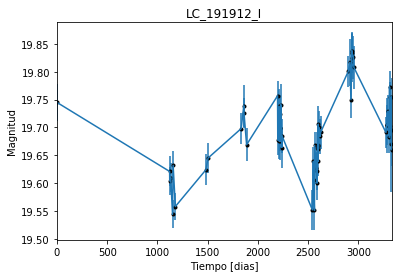

In [2]:
 data = np.genfromtxt('LC_191912_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_191912_I')
plt.savefig("LC_191912_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

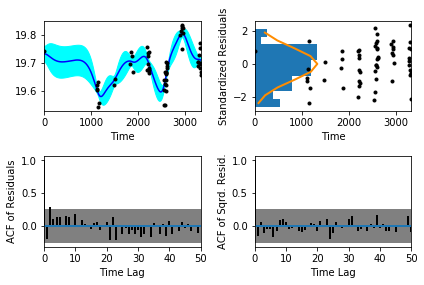

In [5]:
sample.assess_fit()

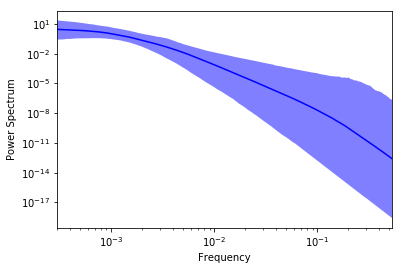

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

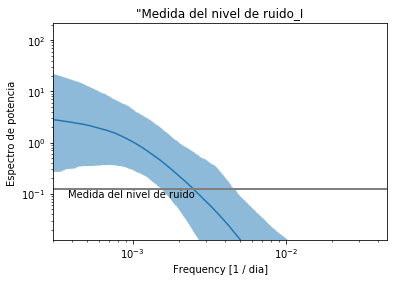

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_191912_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_191912_I')

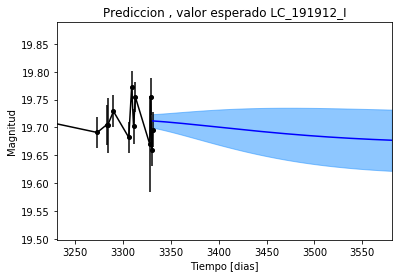

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_191912_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_191912_I')

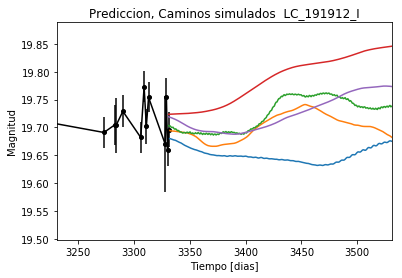

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_191912_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


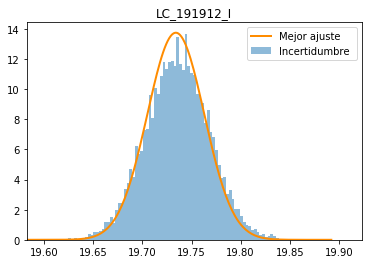

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_191912_I')
plt.savefig("Mejor_ajuste_LC_191912_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_191912_I')

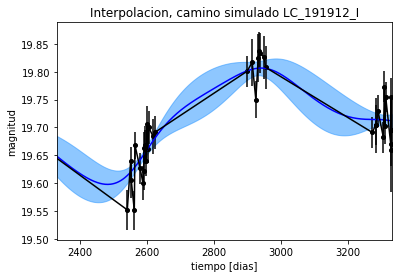

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_I')

Text(0.5,1,'Interpolacion, camino simulado LC_191912_I')

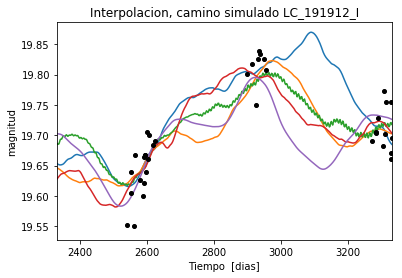

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_191912_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 929.76324665
Median: 0.0109756346563
Standard deviation: 0.207262261762
68% credibility interval: [ 0.00080779  0.20059051]
95% credibility interval: [  3.57083109e-04   8.29221834e-01]
99% credibility interval: [  3.13348548e-04   1.01227838e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 914.563379075
Median: 0.00189389965984
Standard deviation: 0.0988455641435
68% credibility interval: [ 0.00051106  0.02295122]
95% credibility interval: [ 0.0003264  0.3012796]
99% credibility interval: [  3.07561227e-04   8.29221834e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 346.665206974
Median: 0.012536491991
Standard devi

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1240.98373297
Median: 130.414648061
Standard deviation: 1.60112018283
68% credibility interval: [ 128.66738251  131.62958764]
95% credibility interval: [ 126.17802758  132.35444386]
99% credibility interval: [ 124.23054454  132.64232129]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 437.046688921
Median: 0.627193859126
Standard deviation: 2.27622394324
68% credibility interval: [ 0.0493405  3.9901337]
95% credibility interval: [ 0.01375647  7.44745643]
99% credibility interval: [  9.82261258e-03   1.14009432e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 382.545868264
Median: 0.416703316617
Standard deviation: 9.05585072917
68% credibility interval: [ 0.01439677  7.26495186]
95% credibility interval: [  5.540

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 3485.83918376
Median: 4.5408183047e-26
Standard deviation: 1.83741859877e+148
68% credibility interval: [  8.92758679e-98   1.14921267e-06]
95% credibility interval: [  6.85218970e-161   1.87689783e+137]
99% credibility interval: [  1.04294476e-203   3.75771508e+147]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2074.62262431
Median: 19.6914656486
Standard deviation: 0.0440724721007
68% credibility interval: [ 19.65682373  19.72748157]
95% credibility interval: [ 19.60729789  19.77863836]
99% credibility interval: [ 19.54994403  19.8415276 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 420.43612148
Median: 0.00325131746975
Standard deviation: 0.235982965743
68% credibility interval: [ 0.          0.31242508]
95% credibility interval: [ 0.          0.86764515]
99% credibility interval: [ 0.          1.02206776]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 420.43612148
Median: 0.00325131746975
Standard deviation: 0.235982965743
68% credibility interval: [ 0.          0.31242508]
95% credibility interval: [ 0.          0.86764515]
99% credibility interval: [ 0.          1.02206776]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 558.354242722
Median: 0.0
Standard deviation: 0.000600517328961
68% cr

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1240.98373297
Median: 130.414648061
Standard deviation: 1.60112018283
68% credibility interval: [ 128.66738251  131.62958764]
95% credibility interval: [ 126.17802758  132.35444386]
99% credibility interval: [ 124.23054454  132.64232129]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2241.80779106
Median: 0.0065872488568
Standard deviation: 0.0111622815493
68% credibility interval: [ 0.00364497  0.01340243]
95% credibility interval: [ 0.00232936  0.03554863]
99% credibility interval: [ 0.00173944  0.06653172]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2970.03622125
Median: 1.10785408625
Standard deviation: 0.16802897781
68% credibility interval: [ 0.9606859   1.29109687]
95% credibility interval: [ 0.83345866  1.49469158]
99% credibility interval: [ 0.77360228  1.65425158]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 996.106762429
Median: 4.82196810892e-05
Standard deviation: 0.052662079707
68% credibility interval: [  7.28518238e-07   1.82832828e-03]
95% credibility interval: [  7.52631735e-143   4.71226997e-002]
99% credibility interval: [  3.31776854e-153   2.95862698e-001]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 929.76324665
Median: (-0.0689619464092-3.04402765314j)
Standard deviation: 1.97341642837
68% credibility interval: [-1.26034735+0.j        -0.00507549-1.4345648j]
95% credibility interval: [ -5.21015444e+00-4.32019323j  -2.24361935e-03-0.00490535j]
99% credibility interval: [ -6.36033263e+00+0.j          -1.96882700e-03-0.00396073j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 914.563379075
Median: (-0.0118997225159+0j)
Standard deviation: 1.60754293094
68% credibility interval: [-0.14420675+2.63167591j -0.00321107+0.91661377j]
95% credibility interval: [-1.89299556+1.23430218j -0.00205086+0.73958143j]
99% credibility interval: [ -5.21015444e+00+4.32019323j  -1.93246418e-03+0.63422994j]
Posterior summary for paramet